# iShame Coffee Video Pre-Processing

This notebook walks through the process to prepare training and test data for the iShame CNN model. Training data consists of videos of coffee pots in various states of fullness. Videos are decomposed in to invidual frames and associated with the appropriate label. Data is then split in to train and test sets, and saved in h5 format.

In [1]:
import os
import glob
import json
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import h5py
import cv2
from random import randint

First, we retrieve the set of videos in the input folder, which are saved with their class label. We create a dictionary assocating the file path to the video with the appropriate label. Then, we use build a dictionary to label encode the possible classes.

In [2]:
video_dir = '../../img/video/raw'
videos = []
labels = set()
for video in glob.glob(os.path.join(video_dir,"*.mp4")):
    label = os.path.splitext(os.path.basename(video))[0]
    path = video
    videos.append({"label": label, "path": path})
    labels.add(label)

labels = sorted(labels)
label_dict = {idx:label for idx,label in enumerate(labels)}
reverse_label_dict = {label:idx for idx,label in enumerate(labels)}
print(labels)

['0_percent', '10_percent', '20_percent']


For each video, we decompose it in to its individual frames. For each frame, we load it as a numpy array using OpenCV, then resize it. Then, we attach the numpy array and the label to the image_data and image_labels arrays. 

All frame pre-processing would occur in this step. Potential transformations that we are considering include conversion to HSV color space (instead of RGB), resizing, adding noise, etc.

In [3]:
image_data = []
image_labels = []

# frame_save_path = '../img/video/frames'
scale_factor = 0.5
save_every_n = 1

def process_videos(videos, save_path, convert_to_hsv=False):

    for video in videos:

        vidcap = cv2.VideoCapture(video['path'])
        label = video['label']
        label_enc = reverse_label_dict[label]

        count = 0
        success, image = vidcap.read()

        while success:

            if count % save_every_n == 0:

                print('Processing image ', count)

                if convert_to_hsv:
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

                print('Original Image Shape:',image.shape)
                resized_image = cv2.resize(image,(int(image.shape[1]*scale_factor), int(image.shape[0]*scale_factor)))
                print('Resized Image Shape:',resized_image.shape)

                image_data.append(resized_image)
                image_labels.append(label_enc)
                # cv2.imwrite(os.path.join(save_path, "{}_label_{}_frame_{}.jpg".format(video['label'],label_enc,count)),image)
    
            count += 1
            success, image = vidcap.read()

process_videos(videos, None, convert_to_hsv=False)

1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  284
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  285
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  286
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  287
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  288
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  289
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  290
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  291
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  292
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)
Processing image  293
Original Image Shape: (1080, 1920, 3)
Resized Image Shape: (540, 960, 3)


Let's check the dimensions of our image data and labels. Each image has the dimensions (height, width, channels).

In [4]:
print("Image Data Examples:",len(image_data))
print("Number of Image Labels:",len(image_labels))
print("Image Dimensions:", image_data[0].shape)
print("Last Image:",image_data[-1])
print("Last Image Label:",image_labels[-1])


Image Data Examples: 1334
Number of Image Labels: 1334
Image Dimensions: (540, 960, 3)
Last Image: [[[ 98 105 108]
  [ 98 105 108]
  [101 108 111]
  ...
  [100 114 130]
  [100 114 130]
  [ 99 113 129]]

 [[100 107 110]
  [100 107 110]
  [100 107 110]
  ...
  [101 115 131]
  [101 115 131]
  [100 114 130]]

 [[100 107 110]
  [100 107 110]
  [100 107 110]
  ...
  [101 115 131]
  [101 115 131]
  [100 114 130]]

 ...

 [[ 48  79 112]
  [ 46  77 110]
  [ 39  70 103]
  ...
  [ 68  96 124]
  [ 66  94 122]
  [ 66  94 122]]

 [[ 49  79 115]
  [ 47  77 113]
  [ 44  74 110]
  ...
  [ 72 100 128]
  [ 70  98 126]
  [ 67  95 123]]

 [[ 45  75 112]
  [ 43  73 110]
  [ 42  72 109]
  ...
  [ 72 100 128]
  [ 72 100 128]
  [ 71  99 127]]]
Last Image Label: 2


Let's look at a random image and it's label.

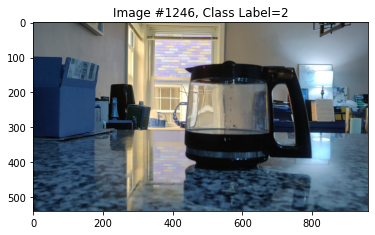

In [5]:
idx = randint(0,len(image_data))
plt.title('Image #' + str(idx) + ', Class Label=' + str(image_labels[idx]))
plt.imshow(image_data[idx])

We use scikit-learn's "train_test_split" method to split our data set in to train (80%) and test (20%) sets. 

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(image_data, image_labels, test_size=0.2, shuffle=True, random_state=42)
print(len(train_data),len(train_labels))
print(len(test_data),len(test_labels))

1067 1067
267 267


We concatenate the training data and test data in to a single numpy array (instead of a list of numpy arrays). The training and test data now have the dimensions (number of example, width, height, channels)

In [7]:
train_data = np.stack(train_data, axis=0)
print(train_data.shape)
test_data = np.stack(test_data, axis=0)
print(test_data.shape)


(1067, 540, 960, 3)
(267, 540, 960, 3)


We normalize the data to scale from the range of (0-255) to (0-1). 

In [8]:
idx = randint(0,len(train_data))
print("Random Image Before Scaling:",train_data[idx][0,0,:])

train_data = train_data/255.
test_data = test_data/255.

print("Random Image After Scaling:",train_data[idx][0,0,:])


Random Image Before Scaling: [137 141 141]
Random Image After Scaling: [0.5372549  0.55294118 0.55294118]


We convert our class labels to be one-hot encoded. Alternatively, we could train the output using the estimated "fullness" of the coffee pot in the range of 0-1 and treat this as a regression problem.

In [9]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

train_labels = convert_to_one_hot(np.array(train_labels,ndmin=2),len(labels))
print(train_labels.shape)
test_labels = convert_to_one_hot(np.array(test_labels,ndmin=2),len(labels))
print(test_labels.shape)

print(train_labels[0])
print(test_labels[19])



(1067, 3)
(267, 3)
[0. 0. 1.]
[1. 0. 0.]


Finally we save our train and test data / labels in a single h5 file.

In [11]:
data_save_path = '../../img/label_data'
data_set_name='coffee_label_data.h5'
filepath=os.path.join(data_save_path,data_set_name)

if(os.path.exists(filepath)):
    os.remove(filepath)
coffee_data = h5py.File(filepath,'w')
coffee_data.create_dataset('train_data', data=train_data)
coffee_data.create_dataset('test_data', data=test_data)
coffee_data.create_dataset('train_labels', data=train_labels)
coffee_data.create_dataset('test_labels', data=test_labels)
coffee_data.close()
